In [3]:
import pandas as pd             #importing the needed libraries 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_excel("bc_data.xlsx")  # read the data 


In [4]:
data.head()       # how the data looks . 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_me,compactness_m,concavity_mean,concave points_,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_wor,compactness_wo,concavity_worst,concave points_.2,symmetry_worst,fractal_dimensio.2
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [6]:
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})   # mapping the diagnosis and change it to categorical variable to be easier 1:malignant , 0 : benign . 


In [14]:
data.groupby('diagnosis').mean().drop('id', axis=1).T
  # calculating the mean for every feature based on the diagnosis case .



diagnosis,0,1
radius_mean,12.056610,17.528800
texture_mean,17.654981,21.541000
perimeter_mean,77.531152,115.941400
area_mean,455.455019,986.906000
smoothness_me,0.092547,0.103066
compactness_m,0.081087,0.146552
concavity_mean,0.047821,0.165529
concave points_,0.025524,0.089975
symmetry_mean,0.175078,0.193400
fractal_dimensio,0.063278,0.062608


In [15]:
data.corr()['diagnosis'].sort_values(ascending=False)   # calculating the corr for every feature with the diagnosis case . 


diagnosis             1.000000
concave points_.2     0.791534
perimeter_worst       0.786830
radius_worst          0.781722
concave points_       0.774633
perimeter_mean        0.750994
radius_mean           0.740129
area_worst            0.738528
area_mean             0.713884
concavity_mean        0.682300
concavity_worst       0.644312
compactness_m         0.588158
compactness_wo        0.580952
radius_se             0.555341
perimeter_se          0.547048
area_se               0.528287
texture_worst         0.461358
texture_mean          0.439932
smoothness_wor        0.410889
symmetry_worst        0.401696
concave points_.1     0.386777
smoothness_me         0.356026
symmetry_mean         0.314928
fractal_dimensio.2    0.276476
compactness_se        0.265766
concavity_se          0.223251
fractal_dimensio.1    0.046451
id                    0.033987
texture_se            0.009024
symmetry_se           0.003025
fractal_dimensio     -0.045195
smoothness_se        -0.046658
Name: di

In [16]:
from scipy.stats import ttest_ind

#classification of data  based on the diagnosis 
benign = data[data['diagnosis'] == 0]
malignant = data[data['diagnosis'] == 1]

# applying t- test for the columns  to show which is statistically significant . 
p_values = {}
for col in data.columns:
    if col not in ['diagnosis', 'id']:
        stat, p = ttest_ind(benign[col], malignant[col])
        p_values[col] = p

#the resault of p - values sorted
p_values = pd.Series(p_values).sort_values()
p_values.head(15)


concave points_.2    3.227357e-91
perimeter_worst      1.966726e-89
radius_worst         1.518718e-87
concave points_      5.230066e-85
perimeter_mean       3.546075e-77
radius_mean          7.241625e-74
area_worst           2.154603e-73
area_mean            1.626397e-66
concavity_mean       1.066202e-58
concavity_worst      1.627956e-50
compactness_m        2.387147e-40
compactness_wo       3.483845e-39
radius_se            2.844538e-35
perimeter_se         4.462452e-34
area_se              1.716796e-31
dtype: float64

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif             
from sklearn.preprocessing import LabelEncoder


data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis'])

X = data.drop(columns=['diagnosis', 'id'])  
y = data['diagnosis']

selector = SelectKBest(score_func=f_classif, k=15) 
selector.fit(X, y)

scores = pd.DataFrame({
    'Feature': X.columns,
    'F_score': selector.scores_,
    'p_value': selector.pvalues_
}).sort_values(by='F_score', ascending=False)

print(scores.head(15))
# Applying ANOVA F-test to identify which features are statistically most important.
# This confirms and extends our t-test results by quantifying each feature's explanatory power.


              Feature     F_score       p_value
27  concave points_.2  699.543185  3.227357e-91
22    perimeter_worst  677.780841  1.966726e-89
20       radius_worst  655.227085  1.518718e-87
7     concave points_  625.647703  5.230066e-85
2      perimeter_mean  539.404724  3.546075e-77
0         radius_mean  505.138360  7.241625e-74
23         area_worst  500.338086  2.154603e-73
3           area_mean  433.378264  1.626397e-66
6      concavity_mean  363.217598  1.066202e-58
26    concavity_worst  295.989172  1.627956e-50
5       compactness_m  220.546103  2.387147e-40
25     compactness_wo  212.438536  3.483845e-39
10          radius_se  185.953078  2.844538e-35
12       perimeter_se  178.086732  4.462452e-34
13            area_se  161.432935  1.716796e-31


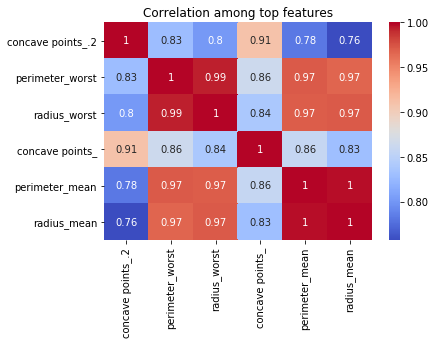

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

important_vars = ['concave points_.2', 'perimeter_worst', 'radius_worst', 
                  'concave points_', 'perimeter_mean', 'radius_mean']
sns.heatmap(data[important_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation among top features")
plt.show()
# showing the correlation between the most important 6 variables. 

In [19]:
important_vars = ['concave points_.2', 'perimeter_worst', 'radius_worst', 
                  'concave points_', 'perimeter_mean', 'radius_mean']

corr_values = data[important_vars].corr()
print(corr_values)
# this may lead to high multicolliniarity so we will drop some features 

                   concave points_.2  perimeter_worst  radius_worst  \
concave points_.2           1.000000         0.828896      0.802405   
perimeter_worst             0.828896         1.000000      0.993535   
radius_worst                0.802405         0.993535      1.000000   
concave points_             0.910251         0.864194      0.839526   
perimeter_mean              0.782634         0.971963      0.971281   
radius_mean                 0.757255         0.966837      0.971571   

                   concave points_  perimeter_mean  radius_mean  
concave points_.2         0.910251        0.782634     0.757255  
perimeter_worst           0.864194        0.971963     0.966837  
radius_worst              0.839526        0.971281     0.971571  
concave points_           1.000000        0.858652     0.830850  
perimeter_mean            0.858652        1.000000     0.997805  
radius_mean               0.830850        0.997805     1.000000  


In [20]:
corr_matrix = data.corr()

corr_with_radius = corr_matrix['radius_mean'].sort_values(ascending=False)

useful_vars = corr_with_radius[corr_with_radius < 0.8]
print(useful_vars)
# showing the corr with the radius mean 

concave points_.2     0.757255
diagnosis             0.740129
area_se               0.728469
concavity_mean        0.682229
radius_se             0.676302
perimeter_se          0.670445
concavity_worst       0.537392
compactness_m         0.524112
compactness_wo        0.437718
texture_mean          0.349112
concave points_.1     0.343998
texture_worst         0.303190
smoothness_me         0.197930
compactness_se        0.196074
symmetry_worst        0.182969
concavity_se          0.169075
symmetry_mean         0.155579
smoothness_wor        0.154039
id                    0.064499
fractal_dimensio.2    0.001812
fractal_dimensio.1   -0.048694
symmetry_se          -0.072269
texture_se           -0.078015
smoothness_se        -0.178318
fractal_dimensio     -0.304596
Name: radius_mean, dtype: float64


In [21]:
data[['radius_mean', 'texture_mean', 'concavity_mean', 'compactness_m', 'diagnosis']].corr()
# selecting the most important variables .

,radius_mean,texture_mean,concavity_mean,compactness_m,diagnosis
radius_mean,1.000000,0.349112,0.682229,0.524112,0.740129
texture_mean,0.349112,1.000000,0.302595,0.246505,0.439932
concavity_mean,0.682229,0.302595,1.000000,0.887396,0.682300
compactness_m,0.524112,0.246505,0.887396,1.000000,0.588158
diagnosis,0.740129,0.439932,0.682300,0.588158,1.000000


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# choosing the 4 variables 
X = data[['radius_mean', 'texture_mean', 'concavity_mean', 'compactness_m']]
y = data['diagnosis']

#train and test the data with 0.8 and 0.2 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#applying logistic regression 
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#applying predication for the test data 
y_pred = model.predict(X_test)

#calculating the accuracy 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9166666666666666
Confusion Matrix:
 [[49  3]
 [ 4 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        52
           1       0.90      0.88      0.89        32

    accuracy                           0.92        84
   macro avg       0.91      0.91      0.91        84
weighted avg       0.92      0.92      0.92        84



# The model was trained using only 4 selected features:
# radius_mean, texture_mean, concavity_mean, and compactness_m

# The accuracy of the model on the test set is approximately 91.67%
# This means the model correctly predicts about 92% of the samples.

# The confusion matrix shows:
# [[49, 3],
#  [4, 28]]
#  49 True Negatives (benign correctly identified)
#  28 True Positives (malignant correctly identified)
#  3 False Positives (benign classified as malignant)
#  4 False Negatives (malignant classified as benign)

# The classification report indicates:
#  Precision: how many predicted positives are actually positive.
#  Recall: how many actual positives were correctly identified.
#  F1-score: harmonic mean of precision and recall.

# Overall, the model performs quite well with balanced precision and recall

# The current results (Accuracy ≈ 0.92) show that even with only 4 features,
# the model captures most of the diagnostic pattern, indicating these
# features are highly informative.


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define your 4 important features
features = ['radius_mean', 'texture_mean', 'concavity_mean', 'compactness_m']

# Prepare data
X = data[features]
y = data['diagnosis']  # assuming 1 = malignant, 0 = benign

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Accuracy check
accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

# Create interactive inputs
radius_input = widgets.FloatText(description='Radius mean:', value=X['radius_mean'].mean())
texture_input = widgets.FloatText(description='Texture mean:', value=X['texture_mean'].mean())
concavity_input = widgets.FloatText(description='Concavity mean:', value=X['concavity_mean'].mean())
compactness_input = widgets.FloatText(description='Compactness mean:', value=X['compactness_m'].mean())

predict_button = widgets.Button(description='Predict Diagnosis', button_style='info')
output = widgets.Output()

def on_predict_clicked(b):
    with output:
        clear_output()
        new_data = pd.DataFrame([[
            radius_input.value,
            texture_input.value,
            concavity_input.value,
            compactness_input.value
        ]], columns=features)
        
        new_data_scaled = scaler.transform(new_data)
        prob = model.predict_proba(new_data_scaled)[0]
        diagnosis = "Malignant" if prob[1] > 0.5 else "Benign"
        
        print(f"Predicted Diagnosis: {diagnosis}")
        print(f"Probability of being Malignant: {prob[1]*100:.1f}%")
        print(f"Probability of being Benign: {prob[0]*100:.1f}%")

predict_button.on_click(on_predict_clicked)

# Display interface
display(radius_input, texture_input, concavity_input, compactness_input, predict_button, output)


Model Accuracy on Test Data: 0.92


FloatText(value=14.015627684964203, description='Radius mean:')

FloatText(value=19.04615751789975, description='Texture mean:')

FloatText(value=0.08995980429594269, description='Concavity mean:')

FloatText(value=0.10452291169451074, description='Compactness mean:')

Button(button_style='info', description='Predict Diagnosis', style=ButtonStyle())

Output()

In [ ]:
#this interactive model allows users to input four key tumor characteristics — radius_mean, texture_mean, concavity_mean, and compactness_mean — to predict the probability of a malignant or benign diagnosis.
#The logistic regression model was trained on the dataset with 91% accuracy, and it returns probabilistic outcomes, providing both predicted class and confidence level for each case.